<a href="https://colab.research.google.com/github/luiz-star/Manipulacao_de_Dados/blob/main/Manipulacao_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Versão Python
from platform import python_version
print('Version Python:', python_version())

Version Python: 3.7.11


In [2]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome do pacote

#Para instalar a versão exata de um pacote, execute o comando abaixo:
#! pip install package name == version

In [3]:
!pip install pandas-profiling==2.8.0
# documentação : https://pandas-profiling.github.io/pandas-profiling/docs/master/index.html

     |████████████████████████████████| 259 kB 4.9 MB/s 
     |████████████████████████████████| 3.1 MB 31.2 MB/s 
     |████████████████████████████████| 59 kB 5.6 MB/s 
     |████████████████████████████████| 675 kB 15.2 MB/s 
     |████████████████████████████████| 812 kB 72.8 MB/s 
     |████████████████████████████████| 28.5 MB 48 kB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=66f3289926f2bec4f82f10fa7831ad79c4d2a3421a22438b603be38a3f8dc067
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=fefebef1f7ff53d0f0179603cae058cf96eaab37c228543f03eae33812e8da5c
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3e297533ddb09407769762985d134135064c6831e29a914e
Successfully built htmlmin imagehash
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling

In [4]:
#Importando Bibliotecas
import pandas as pd  
import numpy as np
import pandas_profiling
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt

#Manipulação de dados com pandas

In [5]:
# carregando um banco de dados de um CSV
df = pd.read_csv('https://raw.githubusercontent.com/LearnDataSci/articles/master/Python%20Pandas%20Tutorial%20A%20Complete%20Introduction%20for%20Beginners/IMDB-Movie-Data.csv',index_col="Title")

É possível ter uma visualização dos dados exibindo apenas as 5 primeiras linhas do DataFrame. Para fazer isso, use o método head especificando como um argumento o número de linhas que você deseja observar

In [6]:
df.head(7)

Rank  ... Metascore
Title                          ...          
Guardians of the Galaxy     1  ...      76.0
Prometheus                  2  ...      65.0
Split                       3  ...      62.0
Sing                        4  ...      59.0
Suicide Squad               5  ...      40.0
The Great Wall              6  ...      42.0
La La Land                  7  ...      93.0

[7 rows x 11 columns]

É possível visualizar as últimas linhas usando o método da cauda, ou seja as ultimas linhas

In [7]:
df.tail()

Rank  ... Metascore
Title                         ...          
Secret in Their Eyes     996  ...      45.0
Hostel: Part II          997  ...      46.0
Step Up 2: The Streets   998  ...      50.0
Search Party             999  ...      22.0
Nine Lives              1000  ...      11.0

[5 rows x 11 columns]

O método info torna possível descobrir rapidamente a categoria das variáveis ​​estudadas

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, Guardians of the Galaxy to Nine Lives
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Genre               1000 non-null   object 
 2   Description         1000 non-null   object 
 3   Director            1000 non-null   object 
 4   Actors              1000 non-null   object 
 5   Year                1000 non-null   int64  
 6   Runtime (Minutes)   1000 non-null   int64  
 7   Rating              1000 non-null   float64
 8   Votes               1000 non-null   int64  
 9   Revenue (Millions)  872 non-null    float64
 10  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 133.8+ KB


In [9]:
#forma(Shape) retorna uma tupla contendo as dimensões do DataFrame
df.shape

(1000, 11)

O método de descrição permite que você aprenda um pouco mais sobre as colunas numéricas de uma tabela. Ele retorna um resumo estatístico dos dados numéricos (mín, máx, média, quantis, ..). É, portanto, uma ferramenta muito útil e fortemente recomendada para uma primeira visualização da distribuição das variáveis.

In [10]:
df.describe()

Rank         Year  ...  Revenue (Millions)   Metascore
count  1000.000000  1000.000000  ...          872.000000  936.000000
mean    500.500000  2012.783000  ...           82.956376   58.985043
std     288.819436     3.205962  ...          103.253540   17.194757
min       1.000000  2006.000000  ...            0.000000   11.000000
25%     250.750000  2010.000000  ...           13.270000   47.000000
50%     500.500000  2014.000000  ...           47.985000   59.500000
75%     750.250000  2016.000000  ...          113.715000   72.000000
max    1000.000000  2016.000000  ...          936.630000  100.000000

[8 rows x 7 columns]

describe () também pode ser usado em uma variável categórica para obter o número de linhas, número exclusivo de categorias, categoria principal e frequência da categoria principal:

In [11]:
df['Genre'].describe()

count                        1000
unique                        207
top       Action,Adventure,Sci-Fi
freq                           50
Name: Genre, dtype: object

.value_counts () pode nos dizer a frequência de todos os valores em uma coluna:

In [12]:
df['Genre'].value_counts().head(10)

Action,Adventure,Sci-Fi       50
Drama                         48
Comedy,Drama,Romance          35
Comedy                        32
Drama,Romance                 31
Comedy,Drama                  27
Animation,Adventure,Comedy    27
Action,Adventure,Fantasy      27
Comedy,Romance                26
Crime,Drama,Thriller          24
Name: Genre, dtype: int64

#Pandas Profiling

In [13]:
# Carregando a Biblioteca

profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_file("movies_report.html")

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
#Imprimindo o Pandas para nossa análise
profile

#Tratamento de duplicatas
Este conjunto de dados não contém linhas duplicadas, mas ainda é importante verificar se você não está agregando linhas duplicadas.

Para demonstrar, vamos apenas duplicar nossos filmes DataFrame adicionando-o a si mesmo

In [15]:
temp_df = df.append(df)

temp_df.shape

(2000, 11)

Usar append () retornará uma cópia sem afetar o DataFrame original. Estamos capturando esta cópia a tempo, portanto, não estamos trabalhando com os dados reais.

Agora podemos tentar remover as duplicatas.

In [16]:
temp_df = temp_df.drop_duplicates()

temp_df.shape

(1000, 11)

#Limpeza de coluna

In [17]:
df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

Podemos usar o método .rename () para renomear algumas ou todas as colunas por meio de um dicionário. Não queremos parênteses, então renomeie-os:

In [18]:
df.rename(columns={
        'Runtime (Minutes)': 'Runtime', 
        'Revenue (Millions)': 'Revenue_millions'
    }, inplace=True)

In [19]:
df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year', 'Runtime',
       'Rating', 'Votes', 'Revenue_millions', 'Metascore'],
      dtype='object')

Mas e se quisermos deixar todos os nomes em letras minúsculas? Em vez de usar .rename (), também podemos definir uma lista de nomes nas colunas da seguinte maneira:

In [20]:
df.columns = ['rank', 'genre', 'description', 'director', 'actors', 'year', 'runtime', 
                     'rating', 'votes', 'revenue_millions', 'metascore']

df.columns

Index(['rank', 'genre', 'description', 'director', 'actors', 'year', 'runtime',
       'rating', 'votes', 'revenue_millions', 'metascore'],
      dtype='object')

Em vez de apenas renomear cada coluna manualmente, podemos realizar a compreensão da lista:

In [21]:
df.columns = [col.lower() for col in df]

df.columns

Index(['rank', 'genre', 'description', 'director', 'actors', 'year', 'runtime',
       'rating', 'votes', 'revenue_millions', 'metascore'],
      dtype='object')

#Valores ausentes

Existem duas opções para lidar com valores NULL:

a) Livre-se de linhas ou colunas com valores NULL

b) Substitua os valores zero por valores diferentes de zero, uma técnica conhecida como imputação

Vamos calcular o número total de valores zero em cada coluna em nosso conjunto de dados. A primeira etapa é verificar quais células em nosso DataFrame são nulas:

In [22]:
df.isnull()

rank  genre  ...  revenue_millions  metascore
Title                                  ...                             
Guardians of the Galaxy  False  False  ...             False      False
Prometheus               False  False  ...             False      False
Split                    False  False  ...             False      False
Sing                     False  False  ...             False      False
Suicide Squad            False  False  ...             False      False
...                        ...    ...  ...               ...        ...
Secret in Their Eyes     False  False  ...              True      False
Hostel: Part II          False  False  ...             False      False
Step Up 2: The Streets   False  False  ...             False      False
Search Party             False  False  ...              True      False
Nine Lives               False  False  ...             False      False

[1000 rows x 11 columns]

A função isnull () incluída no módulo pandas permite que você detecte se valores ausentes estão presentes. Ele recebe um array como argumento e retorna um novo array com as variáveis ​​booleanas: True, se a célula do array original estiver vazia, False caso contrário.

Para contar o número de valores zero em cada coluna, usamos uma função agregada para adicionar:

In [23]:
df.isnull().sum()

rank                  0
genre                 0
description           0
director              0
actors                0
year                  0
runtime               0
rating                0
votes                 0
revenue_millions    128
metascore            64
dtype: int64

In [ ]:
#Remover valores nulos é bastante simples:
# df.dropna()

Esta operação removerá qualquer linha com pelo menos um único valor nulo, mas retornará um novo DataFrame sem alterar o original. Você também pode especificar inplace = True neste método.

Portanto, no caso de nosso conjunto de dados, esta operação excluiria 128 linhas em queenue_millions é nulo e 64 linhas em que metascore é nulo. Isso obviamente parece um desperdício, porque há dados perfeitamente bons nas outras colunas dessas linhas excluídas. É por isso que examinaremos a imputação.

Além de excluir linhas, você também pode excluir colunas com valores nulos definindo axis = 1:

In [24]:
#df.dropna(axis=1)

#Imputação
A imputação é uma técnica usada para manter dados valiosos com valor zero.

Pode haver casos em que a exclusão de cada linha com um valor nulo remove muito do seu conjunto de dados, portanto, podemos imputar esse valor nulo com outro valor, geralmente a média ou mediana dessa coluna.

Vejamos a imputação de valores ausentes na colunaenue_millions. Vamos primeiro extrair essa coluna em sua própria variável:

In [28]:
revenue = df['revenue_millions']
revenue.head()

Title
Guardians of the Galaxy    333.13
Prometheus                 126.46
Split                      138.12
Sing                       270.32
Suicide Squad              325.02
Name: revenue_millions, dtype: float64

Iremos imputar os valores de renda ausentes usando a média. Aqui está o valor médio:

In [29]:
revenue_mean = revenue.mean()
revenue_mean

82.95637614678897

Com a média, vamos preencher os nulos usando fillna ():

In [30]:
revenue.fillna(revenue_mean, inplace=True)

Agora substituímos todos os valores zero pela média da coluna. Observe que, ao usar inplace = True, afetamos o df original:

In [31]:
df.isnull().sum()

rank                 0
genre                0
description          0
director             0
actors               0
year                 0
runtime              0
rating               0
votes                0
revenue_millions     0
metascore           64
dtype: int64

#Fatiamento, seleção e extração de DataFrame
Por coluna: você já viu como extrair uma coluna usando colchetes como este:

In [32]:
genre_col = df['genre']
type(genre_col)

pandas.core.series.Series

Isso retornará uma série. Para extrair uma coluna como um DataFrame, você deve passar uma lista de nomes de coluna. No nosso caso, é apenas uma coluna

In [33]:
genre_col = df[['genre']]
type(genre_col)

pandas.core.frame.DataFrame

Como esta é apenas uma lista, é fácil adicionar outro nome de coluna:

In [34]:
subset = df[['genre', 'rating']]
subset.head()

genre  rating
Title                                                    
Guardians of the Galaxy   Action,Adventure,Sci-Fi     8.1
Prometheus               Adventure,Mystery,Sci-Fi     7.0
Split                             Horror,Thriller     7.3
Sing                      Animation,Comedy,Family     7.2
Suicide Squad            Action,Adventure,Fantasy     6.2

Por linha Para linhas, temos duas opções:

a) .loc - localizar pelo nome

b) .iloc- localiza por índice numérico Lembre-se de que sempre somos indexados pelo título do filme, portanto, para usar .loc, damos a ele o título de um filme:

In [35]:
prom = df.loc["Prometheus"]
prom

rank                                                                2
genre                                        Adventure,Mystery,Sci-Fi
description         Following clues to the origin of mankind, a te...
director                                                 Ridley Scott
actors              Noomi Rapace, Logan Marshall-Green, Michael Fa...
year                                                             2012
runtime                                                           124
rating                                                              7
votes                                                          485820
revenue_millions                                               126.46
metascore                                                          65
Name: Prometheus, dtype: object

Por outro lado, com iloc, damos a ele o índice numérico de Prometeus:

In [36]:
prom = df.iloc[1]
prom

rank                                                                2
genre                                        Adventure,Mystery,Sci-Fi
description         Following clues to the origin of mankind, a te...
director                                                 Ridley Scott
actors              Noomi Rapace, Logan Marshall-Green, Michael Fa...
year                                                             2012
runtime                                                           124
rating                                                              7
votes                                                          485820
revenue_millions                                               126.46
metascore                                                          65
Name: Prometheus, dtype: object

Como você faria com uma lista? Em Python, apenas divida com colchetes como example_list [1: 4]. Funciona da mesma forma em pandas:

In [37]:
movie_subset = df.loc['Prometheus':'Sing']
movie_subset

rank                     genre  ... revenue_millions metascore
Title                                       ...                           
Prometheus     2  Adventure,Mystery,Sci-Fi  ...           126.46      65.0
Split          3           Horror,Thriller  ...           138.12      62.0
Sing           4   Animation,Comedy,Family  ...           270.32      59.0

[3 rows x 11 columns]

In [38]:
movie_subset = df.iloc[1:4]
movie_subset

rank                     genre  ... revenue_millions metascore
Title                                       ...                           
Prometheus     2  Adventure,Mystery,Sci-Fi  ...           126.46      65.0
Split          3           Horror,Thriller  ...           138.12      62.0
Sing           4   Animation,Comedy,Family  ...           270.32      59.0

[3 rows x 11 columns]

#Seleções condicionais
Por exemplo, e se quisermos filtrar nossos filmes para mostrar apenas filmes dirigidos por Ridley Scott ou filmes com uma classificação de 8,0 ou superior?

In [39]:
condition = (df['director'] == "Ridley Scott")
condition.head()

Title
Guardians of the Galaxy    False
Prometheus                  True
Split                      False
Sing                       False
Suicide Squad              False
Name: director, dtype: bool

Semelhante a isnull (), retorna uma série de valores True e False: True para filmes dirigidos por Ridley Scott e False para aqueles não dirigidos por ele.

Queremos filtrar todos os filmes não dirigidos por Ridley Scott, ou seja, não queremos filmes falsos. Para retornar as linhas em que essa condição é True, precisamos passar esta operação no DataFrame:

In [40]:
df[df['director'] == "Ridley Scott"]

rank  ... metascore
Title                         ...          
Prometheus                 2  ...      65.0
The Martian              103  ...      80.0
Robin Hood               388  ...      53.0
American Gangster        471  ...      76.0
Exodus: Gods and Kings   517  ...      52.0
The Counselor            522  ...      48.0
A Good Year              531  ...      47.0
Body of Lies             738  ...      57.0

[8 rows x 11 columns]

In [41]:
df[df['rating'] >= 8.6].head()

rank                    genre  ... revenue_millions metascore
Title                                           ...                           
Interstellar       37   Adventure,Drama,Sci-Fi  ...           187.99      74.0
The Dark Knight    55       Action,Crime,Drama  ...           533.32      82.0
Inception          81  Action,Adventure,Sci-Fi  ...           292.57      74.0
Kimi no na wa      97  Animation,Drama,Fantasy  ...             4.68      79.0
Dangal            118   Action,Biography,Drama  ...            11.15       NaN

[5 rows x 11 columns]

In [42]:
df[(df['director'] == 'Christopher Nolan') | (df['director'] == 'Ridley Scott')].head()
# |"ou" e & ecomercial

rank                     genre  ... revenue_millions metascore
Title                                            ...                           
Prometheus          2  Adventure,Mystery,Sci-Fi  ...           126.46      65.0
Interstellar       37    Adventure,Drama,Sci-Fi  ...           187.99      74.0
The Dark Knight    55        Action,Crime,Drama  ...           533.32      82.0
The Prestige       65      Drama,Mystery,Sci-Fi  ...            53.08      66.0
Inception          81   Action,Adventure,Sci-Fi  ...           292.57      74.0

[5 rows x 11 columns]

Usando o método isin (), no entanto, podemos tornar isso mais conciso:

In [43]:
df[df['director'].isin(['Christopher Nolan', 'Ridley Scott'])].head()

rank                     genre  ... revenue_millions metascore
Title                                            ...                           
Prometheus          2  Adventure,Mystery,Sci-Fi  ...           126.46      65.0
Interstellar       37    Adventure,Drama,Sci-Fi  ...           187.99      74.0
The Dark Knight    55        Action,Crime,Drama  ...           533.32      82.0
The Prestige       65      Drama,Mystery,Sci-Fi  ...            53.08      66.0
Inception          81   Action,Adventure,Sci-Fi  ...           292.57      74.0

[5 rows x 11 columns]

Digamos que queremos que todos os filmes lançados entre 2005 e 2010 tenham uma classificação acima de 8,0, mas abaixo do 25º percentil da receita.

In [44]:
   df[
    ((df['year'] >= 2005) & (df['year'] <= 2010))
    & (df['rating'] > 8.0)
    & (df['revenue_millions'] < df['revenue_millions'].quantile(0.25))
]

rank               genre  ... revenue_millions metascore
Title                                          ...                           
3 Idiots              431        Comedy,Drama  ...             6.52      67.0
The Lives of Others   477      Drama,Thriller  ...            11.28      89.0
Incendies             714   Drama,Mystery,War  ...             6.86      80.0
Taare Zameen Par      992  Drama,Family,Music  ...             1.20      42.0

[4 rows x 11 columns]

#Aplicando funções
criaríamos uma função que, quando observada, determinaria se ela é boa ou ruim:

In [45]:
def rating_function(x):
    if x >= 8.0:
        return "good"
    else:
        return "bad"

Agora queremos enviar toda a coluna de avaliação por meio desta função, que apply () faz:

In [46]:
df["rating_category"] = df["rating"].apply(rating_function)

df.head(2)

rank  ... rating_category
Title                          ...                
Guardians of the Galaxy     1  ...            good
Prometheus                  2  ...             bad

[2 rows x 12 columns]

rating_function retorna uma nova série. Esta série é então atribuída a uma nova coluna chamada rating_category

Você também pode usar funções anônimas. Esta função lambda obtém o mesmo resultado que função_valorização:

In [47]:
df["rating_category"] = df["rating"].apply(lambda x: 'good' if x >= 8.0 else 'bad')

df.head(2)

rank  ... rating_category
Title                          ...                
Guardians of the Galaxy     1  ...            good
Prometheus                  2  ...             bad

[2 rows x 12 columns]

#Crie um Plot
Para variáveis ​​categóricas, use gráficos de barras.

Para variáveis ​​contínuas, use histogramas, gráficos de dispersão, gráficos de linha e boxplots.

In [48]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20, 'figure.figsize': (10, 8)})

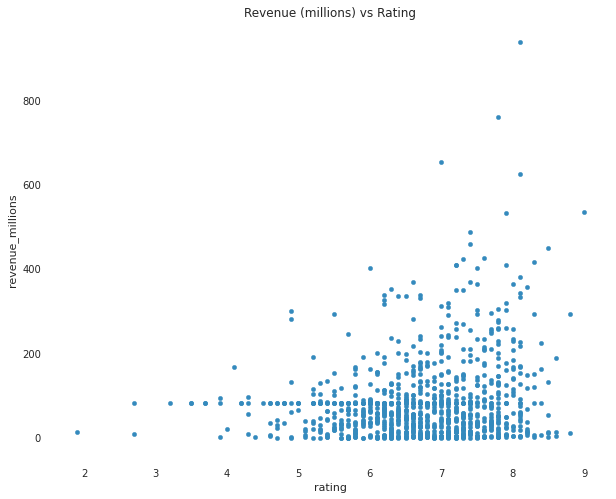

In [49]:
df.plot(kind='scatter', x='rating', y='revenue_millions', title='Revenue (millions) vs Rating');

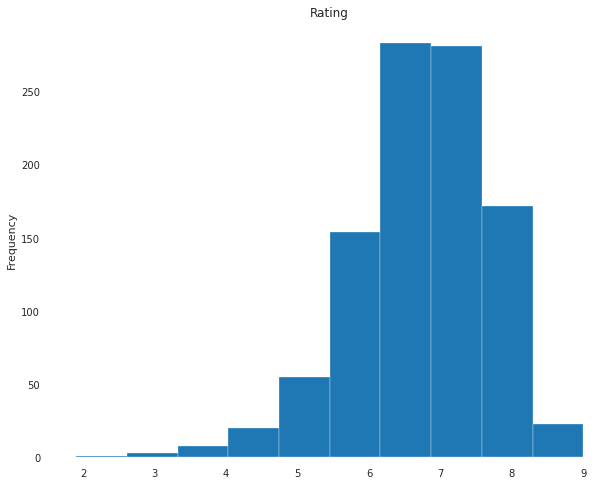

In [50]:
df['rating'].plot(kind='hist', title='Rating');

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


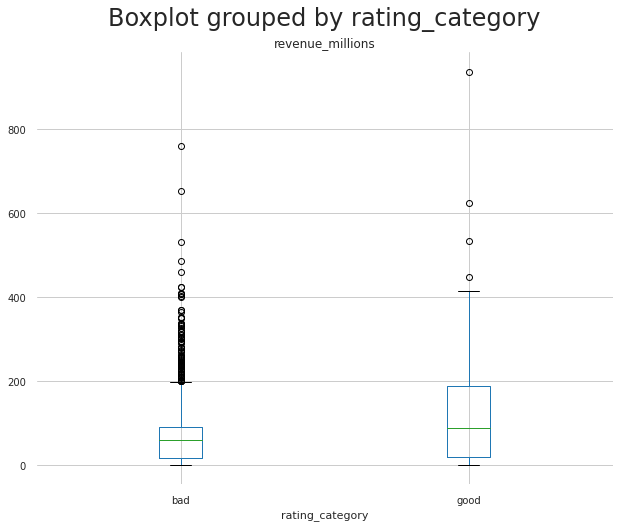

In [51]:
df.boxplot(column='revenue_millions', by='rating_category');